In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras



In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from sklearn.model_selection import train_test_split

In [46]:
X = []
Y = []
X = [((x/2)/100) for x in range(200)]
Y = [(y * 10) for y in X]

print(X)
print(Y)

[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.765, 0.77, 

In [0]:
x = np.array(X,dtype=float)
y = np.array(Y,dtype=float)



In [0]:
x = np.array(x).reshape(200, 1, 1)

In [49]:
x.shape

(200, 1, 1)

In [50]:
y.shape

(200,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)


In [52]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
history = model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Train on 160 samples, validate on 40 samples
Epoch 1/1000
160/160 [==============================] - 2s 15ms/step - loss: 31.8455 - val_loss: 37.8344
Epoch 2/1000
160/160 [==============================] - 0s 169us/step - loss: 31.7371 - val_loss: 37.7272
Epoch 3/1000
160/160 [==============================] - 0s 175us/step - loss: 31.6434 - val_loss: 37.6147
Epoch 4/1000
160/160 [==============================] - 0s 195us/step - loss: 31.5364 - val_loss: 37.4924
Epoch 5/1000
160/160 [==============================] - 0s 182us/step - loss: 31.4231 - val_loss: 37.3599
Epoch 6/1000
160/160 [==============================] - 0s 181us/step - loss: 31.3004 - val_loss: 37.2158
Epoch 7/1000
160/160 [==============================] - 0s 175us/step - loss: 31.1675 - val_loss: 37.0559
Epoch 8/1000
160/160 [==============================] - 0s 168us/step - loss: 31.0219 - val_loss: 36.8764
Epoch 9/1000
160/160 [==============================] - 0s 171us/step - loss: 30.8531 - val_loss: 36.6755
Ep

In [0]:
z = model.predict(x_test)

In [58]:
z.shape

(40, 1)

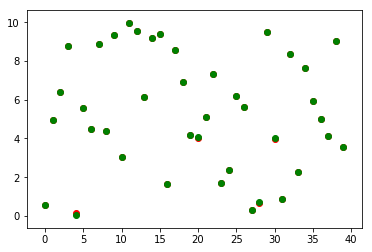

In [59]:
plt.scatter(range(40),results,c='r')
plt.scatter(range(40),y_test,c='g')
plt.show()